In [1]:
import numpy as np
import pandas as pd
import re
import os
from pandas.plotting import scatter_matrix

get_ipython().magic(u'env OMP_NUM_THREADS=2')

from IPython.display import display, HTML

%matplotlib inline
import matplotlib.pyplot as plt

#get_ipython().magic(u'matplotlib')
#get_ipython().magic(u'matplotlib inline')

# Set the ransom seed used for the whole program to allow reprocibility
np.random.seed(3214412)

env: OMP_NUM_THREADS=2


In [2]:
data_dir = '../data/raw'
test_filename = os.path.join(data_dir, 'test.csv')
train_filename = os.path.join(data_dir, 'train.csv')

In [3]:
test_df = pd.read_csv(test_filename)
train_df = pd.read_csv(train_filename)

# Training set

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print 'Column name, Count of unique values, Percent null'
for col in train_df:
    print '{0}, {1}, {2:0.2f}%'.format(
        col, train_df[col].nunique(), 100*train_df[col].isnull().sum() / float(train_df.shape[0]))

Column name, Count of unique values, Percent null
PassengerId, 891, 0.00%
Survived, 2, 0.00%
Pclass, 3, 0.00%
Name, 891, 0.00%
Sex, 2, 0.00%
Age, 88, 19.87%
SibSp, 7, 0.00%
Parch, 7, 0.00%
Ticket, 681, 0.00%
Fare, 248, 0.00%
Cabin, 147, 77.10%
Embarked, 3, 0.22%


In [7]:
print 'Unique values for some columns'
for col in train_df:
    if train_df[col].nunique() < 90:
        vals = train_df[col].unique()
        vals.sort()
        print '{0}\n{1}'.format(col, vals)

Unique values for some columns
Survived
[0 1]
Pclass
[1 2 3]
Sex
['female' 'male']
Age
[  0.42   0.67   0.75   0.83   0.92   1.     2.     3.     4.     5.     6.
   7.     8.     9.    10.    11.    12.    13.    14.    14.5   15.    16.
  17.    18.    19.    20.    20.5   21.    22.    23.    23.5   24.    24.5
  25.    26.    27.    28.    28.5   29.    30.    30.5   31.    32.    32.5
  33.    34.    34.5   35.    36.    36.5   37.    38.    39.    40.    40.5
  41.    42.    43.    44.    45.    45.5   46.    47.    48.    49.    50.
  51.    52.    53.    54.    55.    55.5   56.    57.    58.    59.    60.
  61.    62.    63.    64.    65.    66.    70.    70.5   71.    74.    80.
    nan]
SibSp
[0 1 2 3 4 5 8]
Parch
[0 1 2 3 4 5 6]
Embarked
[nan 'C' 'Q' 'S']


In [8]:
print '% of total for each value for some columns'
for col in train_df:
    if train_df[col].nunique() < 20:
        vals = 100*train_df[col].value_counts() / float(train_df.shape[0])
        vals.sort_index()
        vals = vals.map('{:,.2f}%'.format)
        print '{0}\n{1}'.format(col, vals)

% of total for each value for some columns
Survived
0    61.62%
1    38.38%
Name: Survived, dtype: object
Pclass
3    55.11%
1    24.24%
2    20.65%
Name: Pclass, dtype: object
Sex
male      64.76%
female    35.24%
Name: Sex, dtype: object
SibSp
0    68.24%
1    23.46%
2     3.14%
4     2.02%
3     1.80%
8     0.79%
5     0.56%
Name: SibSp, dtype: object
Parch
0    76.09%
1    13.24%
2     8.98%
5     0.56%
3     0.56%
4     0.45%
6     0.11%
Name: Parch, dtype: object
Embarked
S    72.28%
C    18.86%
Q     8.64%
Name: Embarked, dtype: object


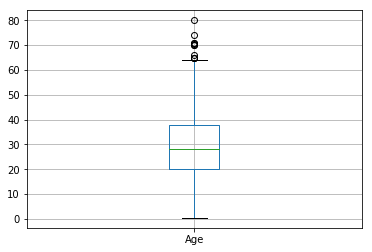

In [9]:
train_df.boxplot(column='Age');

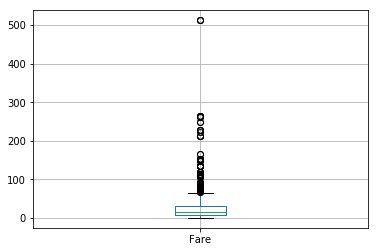

In [10]:
train_df.boxplot(column='Fare');

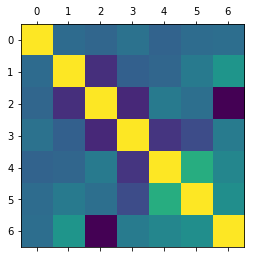

In [11]:
import matplotlib.pyplot as plt
plt.matshow(train_df.corr());

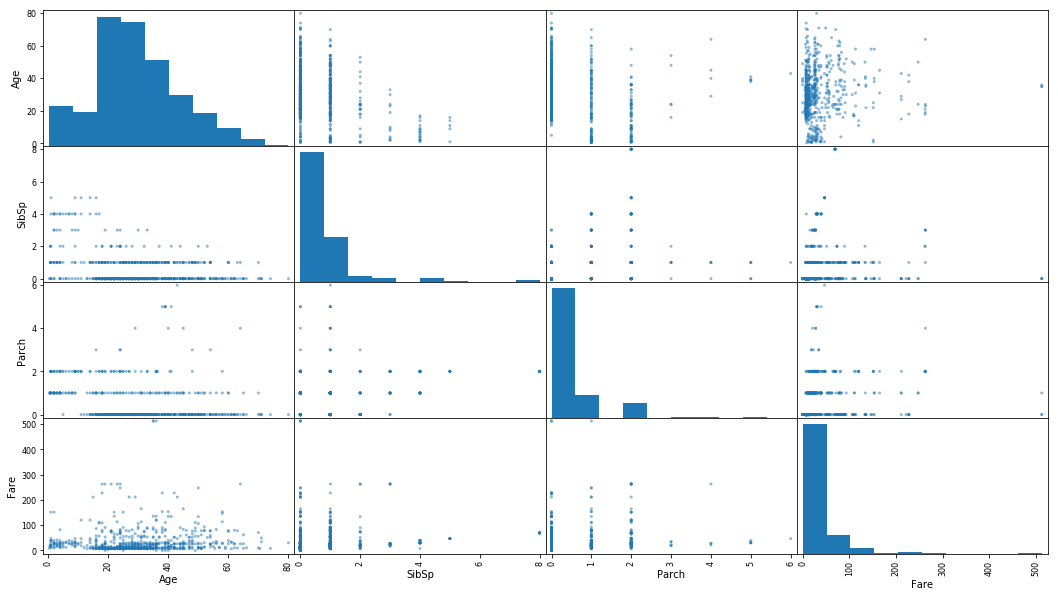

In [12]:
scatter_matrix(train_df[['Age', 'SibSp', 'Parch', 'Fare']], figsize=(18, 10));

In [13]:
train_df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [14]:
regextest = train_df.Cabin.str.extractall('([A-Z])')
display(np.unique(regextest.values))

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

### Cabins sometimes have multiple space delimtied values.  The letter is probably important and dummy columns can be made for A, B, C, D, E, F, G and T.

In [15]:
regextest = train_df.Cabin.str.extract('[A-Z]([0-9]*)')
display(np.unique(regextest.dropna()))

/home/napoleon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


array(['', '10', '101', '102', '103', '104', '106', '11', '110', '111',
       '118', '12', '121', '123', '124', '125', '126', '128', '14', '148',
       '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24',
       '25', '26', '28', '3', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '4', '40', '41', '42', '44', '45', '46', '47',
       '48', '49', '5', '50', '51', '52', '54', '56', '57', '58', '6',
       '62', '63', '65', '67', '68', '69', '7', '70', '71', '73', '77',
       '78', '79', '8', '80', '82', '83', '85', '86', '87', '9', '90',
       '91', '92', '93', '94', '95', '96', '99'], dtype=object)

### Cabins sometimes have the room number.  Let's start by extracting just the first seem room number.

# Build Features

In [66]:
features_df = pd.DataFrame.copy(
    train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Survived']])

# Transform Cabin
for cabin_letter in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
    features_df['Cabin_' + cabin_letter] = features_df.Cabin.str.contains(cabin_letter).fillna(False).astype(int)

features_df['Cabin_Number'] = features_df.Cabin.str.extract('[A-Z]([0-9]*)', expand=False)
features_df.Cabin_Number = features_df.Cabin_Number.replace('', np.nan)

# Fill the NaN Cabin Numbers with the max Cabin Number.  Assumes that lower cabin numbers are better.
features_df['Cabin_Number_NaN'] = features_df.Cabin_Number.isnull().astype(int)
features_df.loc[features_df.Cabin_Number.isnull(),('Cabin_Number')] = features_df.Cabin_Number.max()

# Fill the missing Cabin_Numbers with the Cabin_Number mean
features_df.Cabin_Number = features_df.Cabin_Number.fillna(features_df.Cabin_Number.mean())
features_df.Cabin_Number = features_df.Cabin_Number.astype(int)

# Transform Sex
features_df['Sex'] = (features_df['Sex'] == 'male').astype(int)

# Transform Embarked
features_df = pd.get_dummies(features_df, columns=['Embarked'], dummy_na=True)

# Age is sometimes null, so replace the null values with the mean
features_df['Age'] = features_df.Age.fillna(features_df.Age.mean())

features_df = features_df.drop(labels=['Cabin'], axis=1)
    
display(features_df.head())
assert 0L == features_df.isnull().sum().sum(), 'All cells should be non-nan'

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Cabin_A,Cabin_B,Cabin_C,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Number,Cabin_Number_NaN,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,3,1,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,99,1,0,0,1,0
1,1,0,38.0,1,0,71.2833,1,0,0,1,...,0,0,0,0,85,0,1,0,0,0
2,3,0,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,99,1,0,0,1,0
3,1,0,35.0,1,0,53.1000,1,0,0,1,...,0,0,0,0,123,0,0,0,1,0
4,3,1,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,99,1,0,0,1,0


# Classification Models

In [68]:
from sklearn import linear_model, decomposition, datasets
from sklearn.model_selection import cross_val_score
trainsubset_target_df = features_df[['Survived']]
features_df = features_df.drop(labels=['Survived'], axis=1)

In [69]:
display(features_df.head())
display(trainsubset_target_df.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Number,Cabin_Number_NaN,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,3,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,99,1,0,0,1,0
1,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,85,0,1,0,0,0
2,3,0,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,99,1,0,0,1,0
3,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,123,0,0,0,1,0
4,3,1,35.0,0,0,8.0500,0,0,0,0,0,0,0,0,99,1,0,0,1,0


,Survived
0,0
1,1
2,1
3,1
4,0


In [76]:
from sklearn.linear_model import LogisticRegressionCV
logistic = linear_model.LogisticRegressionCV()
lrcvfit = logistic.fit(features_df, trainsubset_target_df)

In [79]:
lrcvfit.scores_

{1: array([[ 0.66329966,  0.65993266,  0.67676768,  0.75420875,  0.77777778,
          0.77777778,  0.78451178,  0.78787879,  0.78114478,  0.78451178],
        [ 0.7003367 ,  0.71043771,  0.73063973,  0.78451178,  0.78787879,
          0.78451178,  0.79461279,  0.79124579,  0.78787879,  0.79124579],
        [ 0.73063973,  0.73063973,  0.76094276,  0.82491582,  0.80808081,
          0.8013468 ,  0.8013468 ,  0.8047138 ,  0.7979798 ,  0.8047138 ]])}